<a href="https://colab.research.google.com/github/Kevinchaes/UCR_NOAA_2020/blob/main/Copy_of_SatelitesNOAA2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

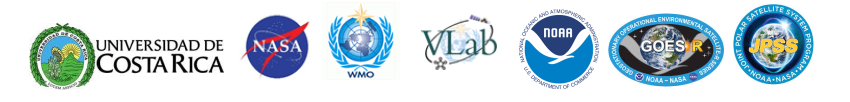

# Pre-taller de Python en la nube para obtener y graficar datos del sensor ABI de GOES 16

## Entrenamiento Virtual en Aplicaciones de Satélites para la RA-IV de la OMM



# Antes de comenzar...

Recuerde que existen casillas de Texto y de Código.

Puede agregar casillas utilizando los botones de arriba a la izquierda donde dice 

> \+ Código

y 

> \+ Texto

luego para ejecutar el código o dejar finalizar la edición de texto debe presionar

> Shift + Enter

sobre cada casilla individual.

---

Por cierto, el tipo de texto que se utiliza aquí es llamado **Markdown** y puede aprender más acerca de como utilizarlo [aquí en Inglés](https://www.markdownguide.org/basic-syntax/) o [aquí en Español](https://markdown.es/sintaxis-markdown/).





# Primero debemos obtener alguna información para visualizar.

Podemos utilizar los mismos datos utilizados en el pre-taller de Python para uso local. Podemos descargar Canal 2 y 13 para el 17 de Julio del 2019 a las 12:00 UTC. Los enlaces mostrados se obtuvieron de [este enlace](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2019-07-17&hour=12).

Note que se comienza con la instrucción !wget donde:

> el símbolo **!** indica que no es un comando de Python sino de GNU/Linux 

y 

> **wget** es un programa para descargar información de sitios web.

Descargamos los datos ejecutando las siguientes dos casillas de código:

In [1]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/291/18/OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc

--2020-10-18 14:11:41--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/291/18/OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.217.46.20
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.217.46.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27440382 (26M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  26.17M  59.2MB/s    in 0.4s    

2020-10-18 14:11:42 (59.2 MB/s) - ‘OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc’ saved [27440382/27440382]



In [2]:
!wget https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/291/18/OR_ABI-L2-CMIPF-M6C15_G16_s20202911820179_e20202911829493_c20202911829581.nc

--2020-10-18 14:11:44--  https://noaa-goes16.s3.amazonaws.com/ABI-L2-CMIPF/2020/291/18/OR_ABI-L2-CMIPF-M6C15_G16_s20202911820179_e20202911829493_c20202911829581.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.65.152
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27027388 (26M) [binary/octet-stream]
Saving to: ‘OR_ABI-L2-CMIPF-M6C15_G16_s20202911820179_e20202911829493_c20202911829581.nc’

OR_ABI-L2-CMIPF-M6C 100%[===================>]  25.77M  38.9MB/s    in 0.7s    

2020-10-18 14:11:45 (38.9 MB/s) - ‘OR_ABI-L2-CMIPF-M6C15_G16_s20202911820179_e20202911829493_c20202911829581.nc’ saved [27027388/27027388]



# Se requieren algunas librerías para poder leer datos satelitales

Una de las librerías más usadas para leer datos satelitales es **NetCDF4** que se instala con el siguiente comando:

In [3]:
!pip install netCDF4

     |████████████████████████████████| 4.3MB 2.8MB/s 
     |████████████████████████████████| 296kB 31.2MB/s 


Una vez instalada, se puede incorporar en Python junto a otras librería útiles para visualización y manipulación de arreglos de números:

In [10]:
import pylab as plt
from netCDF4 import Dataset

In [11]:
ncABIC13 = Dataset("/content/OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc")
ncABIC15 = Dataset("/content/OR_ABI-L2-CMIPF-M6C15_G16_s20202911820179_e20202911829493_c20202911829581.nc")

In [6]:
ncABIC13

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    naming_authority: gov.nesdis.noaa
    Conventions: CF-1.7
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: CF Standard Name Table (v35, 20 July 2016)
    institution: DOC/NOAA/NESDIS > U.S. Department of Commerce, National Oceanic and Atmospheric Administration, National Environmental Satellite, Data, and Information Services
    project: GOES
    production_site: NSOF
    production_environment: OE
    spatial_resolution: 2km at nadir
    orbital_slot: GOES-East
    platform_ID: G16
    instrument_type: GOES R Series Advanced Baseline Imager
    scene_id: Full Disk
    instrument_ID: FM1
    dataset_name: OR_ABI-L2-CMIPF-M6C13_G16_s20202911820179_e20202911829498_c20202911829573.nc
    iso_series_metadata_id: 8c9e8150-3692-11e3-aa6e-0800200c9a66
    title: ABI L2 Cloud and Moisture Imagery
    summary: Single emissive band Cloud and Moisture Imagery Products a

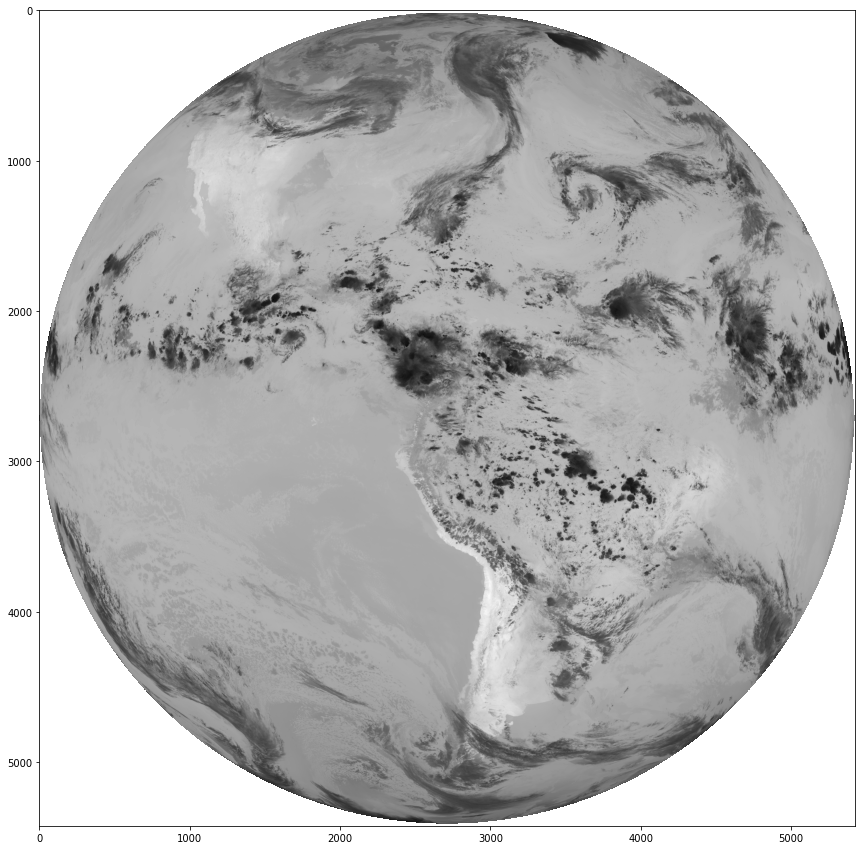

In [13]:
datos = ncABIC15.variables['CMI']
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='gray')

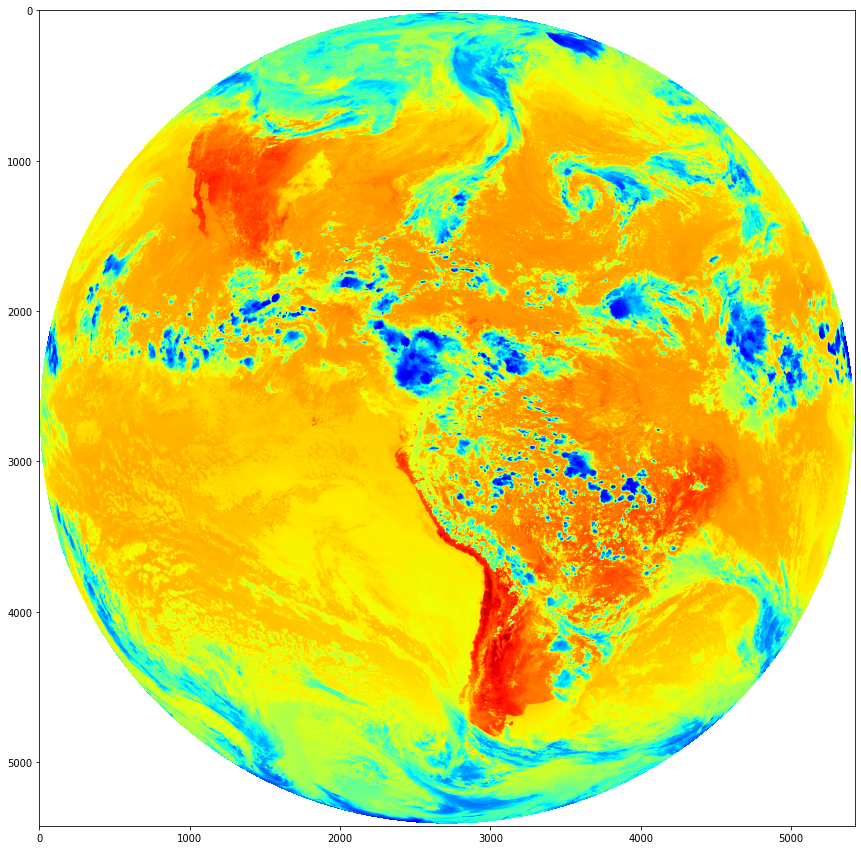

In [14]:
datos = ncABIC13.variables['CMI']
fig, ax = plt.subplots(1,figsize=(15,15))
plt.imshow(datos,cmap='jet')